## Laboratorium 2

In [206]:
import numpy as np
import time
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import combinations, groupby
from copy import deepcopy

### Zadanie 1

In [4]:
def findMax(tab, l): # return iterator

    max_num = float("-inf")
    current_i = l

    for i in range(l, len(tab)):
        if tab[i][l] > max_num:
            current_i = i
            max_num = tab[i][l]

    return current_i


In [5]:
def solverGaussJordan(A, B):
    n = len(A)

    a = A.copy()
    b = B.copy()
    
    a = np.column_stack((a, b))

    for i in range(n):

        switch_i = findMax(a, i)
        a[[i, switch_i], :] = a [[switch_i, i], :]
        # print(a)
        
        for k in range(i):
            # print(i)
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0

        for k in range(i+1, n):
            a[k] = (-1) * (a[k][i] / a[i][i]) * a[i] + a[k]
            a[k][i] = 0.0
    for i in range(n):
        tmp = a[i][i]
        a[i][n] /= tmp
        a[i][i] /= tmp
        

    solve = np.ones((n,1), dtype=np.float64)
    for i in range(n):
        solve[i][0] *= a[i][n]
    # print(a) # skasować gdy 500 albo wiecej
    return solve
    


In [6]:
a = np.array([(1, 2, 3),
              (4, 5, 6),
              (7, 8, 9)], dtype=np.float64)
b = np.array([(1,),
              (2,),
              (3,)], np.float64)

# Dla 500
# A = np.random.uniform(0,10, (500, 500))
# B = np.random.uniform(0,10, (500,1))

A = np.random.uniform(0,10, (3, 3))
B = np.random.uniform(0,10, (3,1))


In [7]:
def gaussJordanTimes(a, b):
    time_s = 0
    n = len(a)
    # print(n)
    
    time_s = time.perf_counter()
    result1 = solverGaussJordan(a, b)
    time_gs = time.perf_counter() - time_s

    time_s = time.perf_counter()
    result2 = np.linalg.solve(a, b)
    time_np_solve = time.perf_counter() - time_s
    
    if np.allclose(result1, result2):
        print("Times for {length}x{length} matrix: \n\
GaussJordan solve: {GJ}   numpy solve: {np_solve}".format(length = n, GJ = time_gs, np_solve = time_np_solve))

    else:
        print("Błędnie wyliczony wynik.")

In [8]:
result1 = solverGaussJordan(A, B)
np_result1 = np.linalg.solve(A,B)
print(np.allclose(np_result1, result1))
print(result1)

True
[[ 4.24841575]
 [-3.68845708]
 [ 1.87590199]]


Porównanie czasu wykonania własno-zaimplementowanego algorytmu z algorytmem z biblioteki numpy


In [9]:
n = 100
table_len = 15
A = [np.random.randint(0, 100, (n * i, n * i)).astype(np.float64) for i in range(1, table_len + 1)]
B = [np.random.randint(0, 100, (n * i, 1)).astype(np.float64) for i in range(1, table_len + 1)]

In [24]:
for i in range(table_len):
    gaussJordanTimes(A[i], B[i])

Times for 100x100 matrix: 
GaussJordan solve: 0.04940376099693822   numpy solve: 0.007131532001949381
Times for 200x200 matrix: 
GaussJordan solve: 0.1923043329952634   numpy solve: 0.03221687400218798
Times for 300x300 matrix: 
GaussJordan solve: 0.3639812740002526   numpy solve: 0.07934849799494259
Times for 400x400 matrix: 
GaussJordan solve: 0.6778506709961221   numpy solve: 0.1314505639966228
Times for 500x500 matrix: 
GaussJordan solve: 1.066565916997206   numpy solve: 0.0077311860004556365
Times for 600x600 matrix: 
GaussJordan solve: 1.5990696270018816   numpy solve: 0.02043770499585662
Times for 700x700 matrix: 
GaussJordan solve: 2.240836890996434   numpy solve: 0.007928277002065443
Times for 800x800 matrix: 
GaussJordan solve: 3.1222133910050616   numpy solve: 0.031608698998752516
Times for 900x900 matrix: 
GaussJordan solve: 4.369718711997848   numpy solve: 0.26409785500436556
Times for 1000x1000 matrix: 
GaussJordan solve: 5.329039288997592   numpy solve: 0.021423370002594

### Zadanie 2 - faktoryzacja

In [11]:
def factorization(A):
    a = A.copy().astype(np.float64)
    n = len(A)
    for i in range(n):
        for j in range(i+1, n):
            x = a[j][i] / a[i][i]
            a[j, i:] = (-1) * x * a[i, i:] + a[j, i:]
            a[j][i] = x
    L = np.tril(a)
    np.fill_diagonal(L, 1)
    U = np.triu(a)
    return L, U

Testowanie poprawności faktoryzacji macierzy

In [12]:
matrix1 = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]], dtype=np.float64)

In [13]:
matrix2 = np.array([[2,2,2],
                    [4,7,7],
                    [6,18,22]], dtype=np.float64)

In [14]:
l1, u1 = factorization(matrix1)
np.allclose(matrix1 - l1@u1, np.zeros((3,3)))

True

In [15]:
print(l1)
print(u1)

[[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
[[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 0.  0.  0.]]


In [16]:
l2, u2 = factorization(matrix2)
np.allclose(matrix2 - l2@u2, np.zeros((3,3)))

True

### Zadanie 3 - analiza obwodu elektrycznego


Loading graph from file - graph will we stored as list of lists and list of dictionaries to simplify searching through graph.

In [188]:
def loadGraph(filename: str):
    with open(filename, "r") as file:
        n = int(file.readline())

        graph = [[] for i in range(n)]
        dict_graph = [dict() for i in range(n)]
        # sem = file.readline().split()
        # S, T, E = int(sem[0]) - 1, int(sem[1]) - 1, int(sem[2])
        lines = file.readlines()
        for line in lines:
            s = line.split()
            if len(s) < 3:
                continue
            u = int(s[0]) - 1
            v = int(s[1]) - 1
            cost = int(s[2])
            dict_graph[u][v] = [cost, None]
            dict_graph[v][u] = [cost, None]
            graph[u].append([v, cost])
            graph[v].append([u, cost])
            # di_graph[u].append([v, cost, None])
    # graph[S].append([T, E])
    # graph[T].append([S, E])
    # di_graph[S][T] = [E, None, 0]
    # di_graph[T][S] = [E, None, 0]

    return graph, dict_graph


Loading additional triplet (s, t, E), where *s* i *t* are nodes, between these a SEM of E value was applied

In [208]:
def loadSEM(s, t, E, graph_org, dict_graph_org):
    graph = deepcopy(graph_org)
    dict_graph = deepcopy(dict_graph_org)
    graph[s].append([t, E])
    graph[t].append([s, E])
    dict_graph[s][t] = [E, None]
    dict_graph[t][s] = [E, None]
    # return new graphs with SEM 
    return graph, dict_graph

Prescribing resolved graph to networkx library for simpler drawning.

In [149]:
def graphToNx(graph, s, t, flag = True):
    fig, ax1 = plt.subplots(figsize = (10, 10))

    G = nx.DiGraph()
    n = len(graph)
    max_weigh = 0


    labels = {}
    if flag:
        for i in range(n):
            for j, cost in graph[i]:
                G.add_edge(i, j, weight=cost)
                max_weigh = max(cost, max_weigh)

    else:
        # H = nx.random_regular_graph(3, 500)
        G = nx.fast_gnp_random_graph(50, 0.3, directed=True)
        # G = nx.grid_2d_graph(5, 5)
        # G = H.to_directed()
        for (u, v) in G.edges():
            x = random.randint(0,10)
            max_weigh = max(x, max_weigh)
            G.edges[u,v]['weight'] = x

    # pos = nx.planar_layout(G)
    # pos = nx.spring_layout(G)
    # pos = nx.random_layout(G)
    pos = nx.circular_layout(G)
    # print(nx.cycle_basis(G,s))
    for node in G.nodes():
        labels[node] = node

    # bounds = np.linspace(0, max_weigh, int(min(max_weigh + 1, 255)))
    # tickks = np.linspace(0, max_weigh, int(min(10, max_weigh + 1)))
    cos = [0]
    jakto = np.linspace(10e-5, max_weigh, 5)
    for i in range(len(jakto)):
        cos.append(jakto[i])
    bounds =cos

    # bounds = [0.5, 0.7, 1.5, 2]
    # tickks = np.linspace(0, max_weigh, 5)
    tickks = bounds
    # tickks = [0.5, 0.7, 1.5, 2]


    cmap = plt.cm.jet
    # print(cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])

    edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())

    weights = list(weights)
    k = len(weights)
    for i in range(k):
        for j in range(len(bounds)):
            if weights[i] < bounds[j]:
                weights[i] = bounds[j]
                break

    # nx.draw(G, pos = pos, width = 3, edge_color=weights, edge_cmap = cmap, with_labels = True, ax = ax1)
    nx.draw_networkx_nodes(G, pos=pos, ax=ax1, node_size=100, edgecolors='r', node_color='w')
    nx.draw_networkx_edges(
        G,
        pos=pos,
        width=3,
        arrowstyle="->",
        arrowsize=5,
        edge_color=weights,
        edge_cmap=cmap,
        ax=ax1,
    )

    nx.draw_networkx_labels(G, pos, labels, font_size=6, font_color="r", ax = ax1)

    # print(nx.cycle_basis(G, 0))
    print(len(G.edges))
    
    # nx.draw(G, with_labels=True)
    # nx.draw(G, with_labels = True, ax = ax1)
    # print(weights)
    cb = mpl.colorbar.ColorbarBase(
        ax2,
        cmap=cmap,
        norm=norm,
        spacing="proportional",
        ticks=tickks,
        boundaries=bounds,
        format="%.5f",
    )
    plt.show()
    # plt.savefig("graph.png", dpi=1000)



Finding basics cycles in graph - Paton's algorithm

In [7]:
def paton(G, root = None):
    
    nodes_of_graph = set(range(len(G)))
    cycles = []
    # checking all connected components
    while nodes_of_graph:
        if root is None:
            root = nodes_of_graph.pop() 
        stack = [root]
        parent = {root : root}
        T = {root: {}}

        while stack:
            z = stack.pop()
            zused = T[z]
            for v, cost in G[z]:
                if v not in T: # first time
                    T[v] = {z}
                    parent[v] = z
                    stack.append(v)
                elif v == z: # self cycle
                    cycles.append([v])
                elif v not in zused: # find cycle - node v in spanning tree
                    level = T[v]
                    cycle = [v, z]
                    p = parent[z]

                    while p not in level:
                        cycle.append(p)
                        p = parent[p]
                    
                    cycle.append(p)
                    cycles.append(cycle)
                    T[v].add(z)
        
        nodes_of_graph -= set(parent)
        root = None
    
    return cycles




Deviding power correspondingly with Kirchhoff's first law

In [182]:
def powerDivideTrash(G, root):
    
    n = len(G)
    stack = [root]
    power_counter = 0
    visited = [False for _ in range(n)]
    
    def dfs(u, tmp_counter):
        counter = 0
        while len(G[u]) == 2:
            for i, (v, cost, intensity) in enumerate(G[u]):
                if counter >= 2:
                    return
                if intensity is not None:
                    counter += 1
                    continue
                visited[v] = True
                G[u][i][2] = tmp_counter
                u = v
        if len(G[u]) != 1:
            stack.append(u)
    # BFS
    while stack:
        p = stack.pop()
        visited[p] = True

        for i, (v, cost, intensity) in enumerate(G[p]):
            if intensity is not None:
                continue
            if visited[v]:
                continue
            G[p][i][2] = power_counter
            print(len(G[v]))
            if len(G[v]) != 1 and len(G[v]) != 2:
                power_counter += 1
                stack.append(v)
            else:
                dfs(v, power_counter)
                power_counter += 1
    


In [183]:
def powerDivide(G, root):
    stack = [root]
    power_counter = 0
    
    def dfs(u, tmp_counter):
        # print("witam")
        for v in G[u]:
            if G[v][u][1] is not None:
                continue
            G[u][v][1] = tmp_counter
            # print(v, u)
            if len(G[v]) == 2:
                # print("G")
                dfs(v, tmp_counter)
        stack.append(v)

    # BFS
    while stack:
        p = stack.pop()

        # if p == end_node:
        #     continue

        for v in G[p]:
            if G[p][v][1] is not None or G[v][p][1] is not None:
                continue

            G[p][v][1] = power_counter
            # print("1st ",p,v)
            if len(G[v]) != 1 and len(G[v]) != 2:
                power_counter += 1
                stack.append(v)
            else:
                # print("2st ",p, v)
                dfs(v, power_counter)
                power_counter += 1
    return power_counter    


Filling matrix with values of powers and basics cycles

In [247]:
def fillMatrix(cycles, network, matrix_orgX, matrix_orgB, s, t, E):
    # network - dict_graph_copy
    matrix = matrix_orgX.copy()
    matrixb = matrix_orgB.copy()
    n = len(network)
# [[8, 2, 0], [5, 4, 2, 0], [5, 3, 9, 8, 0]]
    for i, node in enumerate(network):
        for j in node:
            if network[i][j][1] is not None:
                cnt = network[i][j][1]
                matrix[i][cnt] -= 1
            else:
                cnt = network[j][i][1]
                matrix[i][cnt] += 1

    for i in range(len(cycles)):
        for j in range(-1, len(cycles[i]) - 1):
            a = cycles[i][j]
            b = cycles[i][j + 1]

            if a == s and b == t or a == t and b == s:
                if a == s and b == t:
                    matrixb[i + n][0] += E
                else:
                    matrixb[i + n][0] -= E

                continue
                    
                    

            if network[a][b][1] is not None:
                val, col = network[a][b]
                matrix[i + n][col] += val
            else:
                
                val, col = network[b][a]
                matrix[i + n][col] -= val
    # to_delete = np.where(~matrix.any(axis=1))[0]
    # dele = to_delete
    # for i in range(len(to_delete)):
    #     matrix = np.delete(matrix, dele[0], 0)
    #     matrixb = np.delete(matrixb, dele[0], 0)
    #     dele = np.where(~matrix.any(axis=1))[0]



    return matrix, matrixb


Complete graph with value of power in each edge

In [254]:
def solvedGraph(solution, graphH):
    return_graph = [[] for _ in range(len(graphH))]
    for i, dic in enumerate(graphH):
        for v in dic:
            if graphH[i][v][1] is not None:
                x = solution[graphH[i][v][1]][0]
                if x > 0:
                    return_graph[i].append([v, x])
                else:
                    return_graph[v].append([i, abs(x)])
    
    return return_graph

Example of use

In [236]:
# graph_copy, s, t, E, dict_graph_copy = loadGraph("graf.txt")
graph_t3_org, dict_graph_t3_org = loadGraph("t3.txt")


In [237]:
s1, t1, E1 = 0, 2, 60
graph_t3_1, dict_graph_t3_1 = loadSEM(s1, t1, E1, graph_t3_org, dict_graph_t3_org)

In [238]:
len_of_powers1 = powerDivide(dict_graph_t3_1, s1)

In [239]:
for i, v in enumerate(dict_graph_t3_org):
    print(i, v)

# print(list(dict_graph_copy[0]))

0 {5: [23, None], 7: [23, None], 8: [37, None]}
1 {3: [7, None]}
2 {4: [18, None], 8: [41, None]}
3 {1: [7, None], 5: [25, None], 9: [20, None]}
4 {2: [18, None], 5: [10, None]}
5 {0: [23, None], 3: [25, None], 4: [10, None]}
6 {}
7 {0: [23, None]}
8 {0: [37, None], 2: [41, None], 9: [33, None]}
9 {3: [20, None], 8: [33, None]}


22


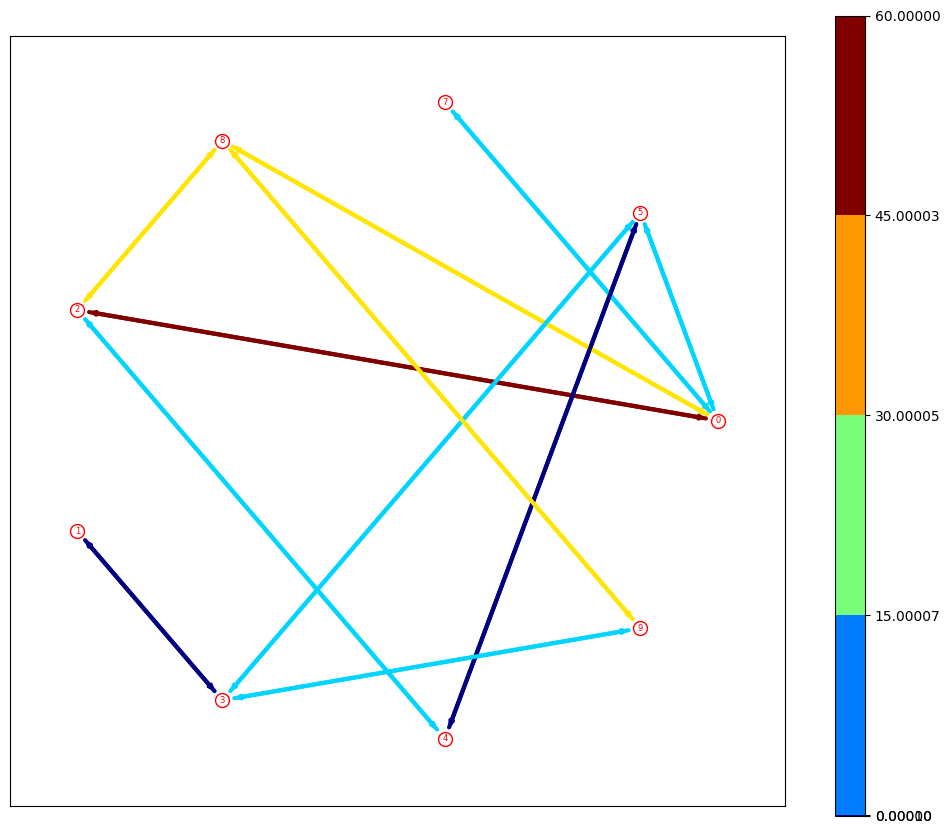

In [240]:
graphToNx(graph_t3_1, s1, t1)

In [241]:
cycles1 = paton(graph_t3_1)

Created a matrix with dimensions : amount of basics_cycles + amount of nodes in graph / amount of powers in circuit


In [243]:
c_len = len(cycles1)
n_len = len(dict_graph_t3_1)

matrixX = np.zeros((c_len + n_len, len_of_powers1))
matrixB = np.zeros((c_len + n_len, 1))


Solving equation

In [248]:
to_solveX, to_solveB = fillMatrix(cycles1, dict_graph_t3_1, matrixX, matrixB, s1, t1, E1)

In [255]:
solved = np.linalg.lstsq(to_solveX, to_solveB, rcond=None)[0]

In [257]:
solution_graph1 = solvedGraph(solved, dict_graph_t3_1)

Drawning solved example

11


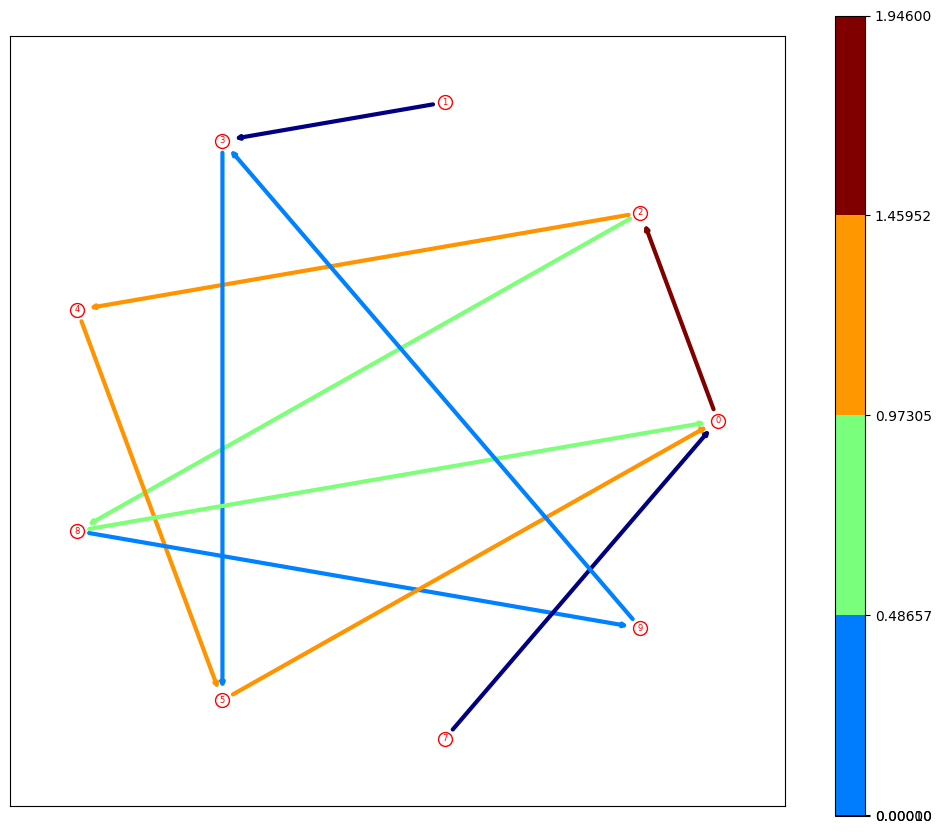

In [259]:
graphToNx(solution_graph1, s1, t1)

Sprawdzanie czy prądy są rozłożone poprawnie

In [140]:
def checkSolution(graph, s, t):
    # suma wychodzących ma się równąc sumie wchodzących
    pass


#### Generowanie odpowiedznich grafów do pliku

1. Spójny graf losowy </br>
Funkcja ```gnpRandomConnectedGraph``` jest podobna do budowania grafu losowego Erdős-Rényi, jednak w wyniku daje graf spójny

In [172]:
def gnpRandomConnectedGraph(n, filename):
    p = random.random()
    edges = combinations(range(n), 2)

    with open(filename, 'w') as f:
        print(n, file= f)
        print(edges)

        for _, node_edges in groupby(edges, key=lambda x: x[0]):
            node_edges = list(node_edges)
            random_edge = random.choice(node_edges)
            for e in node_edges:
                if random.random() < p:
                    pass
    return



In [173]:
S = gnpRandomConnectedGraph(10, "cos2")
# nx.draw_networkx(S)